In [1]:
import sys
sys.path.append('../../')
import numpy as np

from rover_simulator.world import World
from rover_simulator.rover import BasicRover
from rover_simulator.history import History
from rover_simulator.navigation.path_planner.sampling_base import RRTstar

In [2]:
world = World()
world.read_objects("../../rover_simulator/examples/environment_simple.txt")

rover_r = 0.5
start_pose = np.array([1.0, 1.0, 0.0])
goal_pos = np.array([13.0, 15.0])

path_planner = RRTstar(
    start_pose,
    goal_pos,
    enlarge_range=rover_r,
    explore_region=[[0, 20], [0, 20]],
    known_obstacles=world.obstacles
)

rover = BasicRover(
    start_pose, rover_r,
    sensor=None,
    mapper=None,
    path_planner=path_planner,
    localizer=None,
    controller=None,
    history=History()
)

world.append_rover(rover)

In [3]:
rover.waypoints = rover.path_planner.calculate_path(max_iter=500)

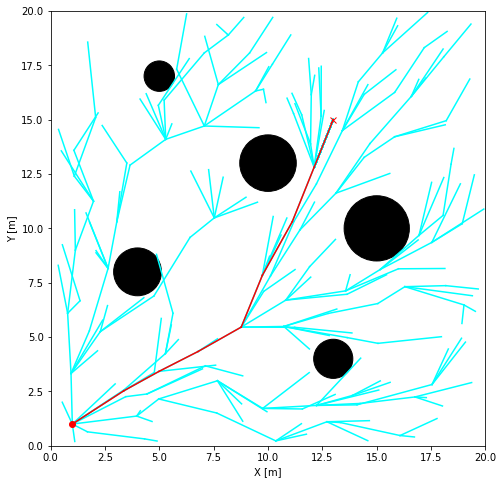

In [4]:
path_planner.draw(
    xlim=[0.0, 20.0],
    ylim=[0.0, 20.0],
    obstacles=world.obstacles, enlarge_range=rover.r
)

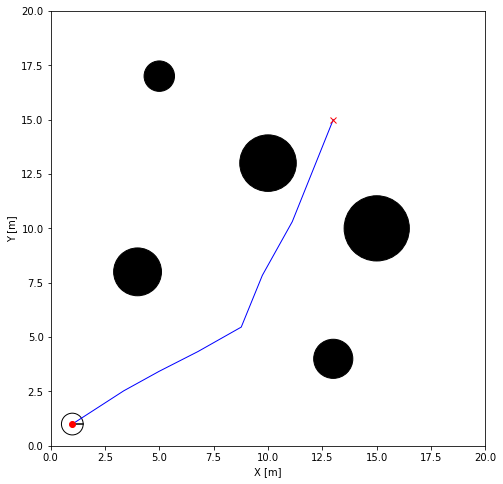

In [5]:
world.draw(
    xlim=[0, 20], ylim=[0, 20],
    start_pos=start_pose[0:2], goal_pos=goal_pos,
    enlarge_range=rover.r, draw_waypoints_flag=True
)